# Objective
The objective of this notebook to determine the impact effects of covid on the community. Many businesses have temporarily closed due to COVID-19 resulting in less close contact amongst individuals. Thus, I am curious as to how the community is coping with social distancing.  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns

%matplotlib inline

In [6]:
april_covid_impact = pd.read_csv('01_April_30_covid_impact_survey.csv', low_memory=False)
may_covid_impact = pd.read_csv('02_May_12_covid_impact_survey.csv', low_memory=False)
june_covid_impact = pd.read_csv('03_June_9_covid_impact_survey.csv')

In [7]:
print(april_covid_impact.shape)
april_covid_impact.head()

(8790, 174)


,Unnamed: 0,SU_ID,P_PANEL,NATIONAL_WEIGHT,REGION_WEIGHT,NATIONAL_WEIGHT_POP,REGION_WEIGHT_POP,P_GEO,SOC1,SOC2A,...,REGION9,P_DENSE,MODE,LANGUAGE,MAIL50,RACE1_BANNER,RACE2_BANNER,INC_BANNER,AGE_BANNER,HH_BANNER
0,1,20001173,ABS,NaN,1.218648,NaN,41103.599135,New York,(3) Some,(4) Once a month,...,(2) Mid-Atlantic,(3) Urban,(2) Web Interview,(1) English,(3) 4/22/2020,(1) NH white 5,NaN,"(1) Less than $30,000",(2) 23-64,(4) 3 or more kids
1,2,20002089,ABS,NaN,0.228867,NaN,3127.867402,"Phoenix-Mesa-Chandler, Arizona",(3) Some,(3) A few times a month,...,(8) Mountain,(3) Urban,(2) Web Interview,(1) English,(2) 4/21/2020,(1) NH white 5,NaN,(4) More than $125k,(3) 65+,(2) +1 other adult only
2,3,20002704,ABS,NaN,0.251659,NaN,1960.942970,Oregon,(3) Some,(3) A few times a month,...,(9) Pacific,(3) Urban,(2) Web Interview,(1) English,(1) 4/20/2020,(88) Removed for disclosure risk,NaN,(4) More than $125k,(3) 65+,(2) +1 other adult only
3,4,20002713,ABS,NaN,0.207222,NaN,958.491227,"Pittsburgh, Pennsylvania",(3) Some,(2) A few times a week,...,(2) Mid-Atlantic,(3) Urban,(2) Web Interview,(1) English,(1) 4/20/2020,(2) NH black 5,NaN,(3) $60k to less than $125k,(3) 65+,(2) +1 other adult only
4,5,20003003,ABS,NaN,3.385956,NaN,10720.255694,"Cleveland-Elyria, Ohio",(3) Some,(1) Basically every day,...,(3) East North Central,(3) Urban,(2) Web Interview,(1) English,(1) 4/20/2020,(1) NH white 5,NaN,(3) $60k to less than $125k,(3) 65+,(2) +1 other adult only


---

# Representative
Is the data representative of the United States population, or is it only representative of the subjects it surveys?

In [8]:
sample = pd.concat([april_covid_impact, may_covid_impact, june_covid_impact], ignore_index=True, sort=False)
print(sample['P_GEO'].unique())
print(sample['P_GEO'].nunique())

coordinates = {
    'New York': [40.712776,-74.005974], 
    'Phoenix-Mesa-Chandler, Arizona': [33.30616,-111.84125],
    'Oregon': [43.804133,-120.554201],
    'Pittsburgh, Pennsylvania': [40.440625,-79.995886],
    'Cleveland-Elyria, Ohio':[41.36838,-82.107649], 
    'Florida': [27.664827,-81.515753 ],
    'Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin': [ 41.189757,-87.526146],
    'Montana': [46.879682,-110.362566],
    'Louisiana': [30.984298,-91.962333],
    'Colorado': [39.550051,-105.782067], 
    'Texas': [31.968599,-99.901813], 
    'Missouri': [37.964253,-91.831833], 
    'Birmingham-Hoover, Alabama': [33.405387,-86.811378],
    'Columbus, Ohio': [39.961176,-82.998794], 
    'Baltimore-Columbia-Towson, Maryland': [39.372594,-76.641271],
    'Atlanta-Sandy Springs-Alpharetta, Georgia': [34.075376,-84.29409], 
    'California': [36.778261,-119.417932], 
    'Minnesota': [46.729553,-94.6859],   
}

df = {'City': [],
     'Country': [],
     'Latitude': [],
     'Longitude': []}
for coordinate, lat_long in coordinates.items():
    df['City'].append(coordinate)
    df['Country'].append('United States of America')
    df['Latitude'].append(lat_long[0])
    df['Longitude'].append(lat_long[1])  
df = pd.DataFrame(df);

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

gdf.head()

['New York' 'Phoenix-Mesa-Chandler, Arizona' 'Oregon'
 'Pittsburgh, Pennsylvania' 'Cleveland-Elyria, Ohio' 'Florida'
 'Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin' 'Montana'
 'Louisiana' 'Colorado' 'Texas' 'Missouri' 'Birmingham-Hoover, Alabama'
 'Columbus, Ohio' 'Baltimore-Columbia-Towson, Maryland'
 'Atlanta-Sandy Springs-Alpharetta, Georgia' 'California' 'Minnesota' nan]
18


,City,Country,Latitude,Longitude,geometry
0,New York,United States of America,40.712776,-74.005974,POINT (-74.00597 40.71278)
1,"Phoenix-Mesa-Chandler, Arizona",United States of America,33.306160,-111.841250,POINT (-111.84125 33.30616)
2,Oregon,United States of America,43.804133,-120.554201,POINT (-120.55420 43.80413)
3,"Pittsburgh, Pennsylvania",United States of America,40.440625,-79.995886,POINT (-79.99589 40.44062)
4,"Cleveland-Elyria, Ohio",United States of America,41.368380,-82.107649,POINT (-82.10765 41.36838)


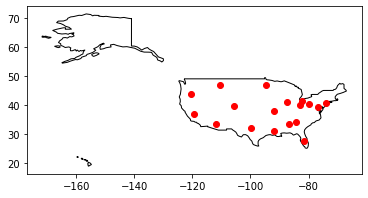

In [9]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to the United States of America.
ax = world[world.name == 'United States of America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

# Result
The data seems to represent both urban and rural places, places with low and high population counts so it is representative for the most part. However we must not forget that the survey was voluntary and so the data does hold a voluntary response bias. Nevertheless, we proceed with our analysis

---

# Questions of Interest

## SOC3A
In the past month, how often did you communicate with friends and family by phone, text, email, app,
or using the Internet? 

## SOC3B
During a typical month prior to March 1, 2020, when COVID-19 began spreading in the United States,
how often did you communicate with friends and family by phone, text, email, app, or using the
Internet?`

In [10]:
june_covid_impact['SOC3B'].value_counts()

(1) Basically every day    4163
(2) A few times a week     2434
(3) A few times a month     708
(4) Once a month            116
(5) Not at all               41
(98) SKIPPED ON WEB          25
(77) Not sure                18
Name: SOC3B, dtype: int64

In [11]:
june_covid_impact['SOC3A'].value_counts()

(1) Basically every day    4940
(2) A few times a week     1908
(3) A few times a month     463
(4) Once a month             88
(5) Not at all               48
(98) SKIPPED ON WEB          45
(77) Not sure                13
Name: SOC3A, dtype: int64

### Quick Observation
It appears that the pandemic has increased the daily communication of friends and family while decreasing the number of people who contacted their friends and family weekly/monthly. In other words, there is more daily communication and less weekly/monthly communication.

We create a pivot table to analyze data between months

In [12]:
april_covid_impact['month'] = 'april'
may_covid_impact['month'] = 'may'
june_covid_impact['month'] = 'june'

covid_impact = pd.concat([april_covid_impact, may_covid_impact, june_covid_impact], ignore_index=True, sort=False)
covid_impact = covid_impact.dropna(axis=1, how='all')

covid_impact['sum_col'] = 1

In [13]:
covid_soc3a = covid_impact[['SOC3A', 'month', 'sum_col']].copy()
covid_soc3a['SOC'] = '3A'
covid_soc3a = covid_soc3a.rename(columns={'SOC3A':'results'})

covid_soc3b = covid_impact[['SOC3B', 'month', 'sum_col']].copy()
covid_soc3b['SOC'] = '3B'
covid_soc3b = covid_soc3b.rename(columns={'SOC3B':'results'})

covid_soc = pd.concat([covid_soc3a, covid_soc3b], ignore_index=True)
covid_soc.head()

,results,month,sum_col,SOC
0,(1) Basically every day,april,1,3A
1,(1) Basically every day,april,1,3A
2,(1) Basically every day,april,1,3A
3,(1) Basically every day,april,1,3A
4,(1) Basically every day,april,1,3A


In [14]:
pd.pivot_table(covid_soc, values='sum_col', index=['month', 'SOC'], columns=['results'], aggfunc=np.sum)

results    (1) Basically every day  (2) A few times a week  \
month SOC                                                    
april 3A                      5960                    2153   
      3B                      4688                    3002   
june  3A                      4940                    1908   
      3B                      4163                    2434   
may   3A                      5961                    2225   
      3B                      4804                    2994   

results    (3) A few times a month  (4) Once a month  (5) Not at all  \
month SOC                                                              
april 3A                       471                98              45   
      3B                       855               150              35   
june  3A                       463                88              48   
      3B                       708               116              41   
may   3A                       574                83              57   
      3B                       941               146              42   

results    (77) Not sure  (98) SKIPPED ON WEB  
month SOC                                      
april 3A               8                   55  
      3B              24                   36  
june  3A              13                   45  
      3B              18                   25  
may   3A              15                   59  
      3B              22                   25

In [15]:
pd.pivot_table(covid_soc, values='sum_col', index=['SOC'], columns=['results'], aggfunc=np.sum)

results,(1) Basically every day,(2) A few times a week,(3) A few times a month,(4) Once a month,(5) Not at all,(77) Not sure,(98) SKIPPED ON WEB
SOC,,,,,,,
3A,16861,6286,1508,269,150,36,159
3B,13655,8430,2504,412,118,64,86


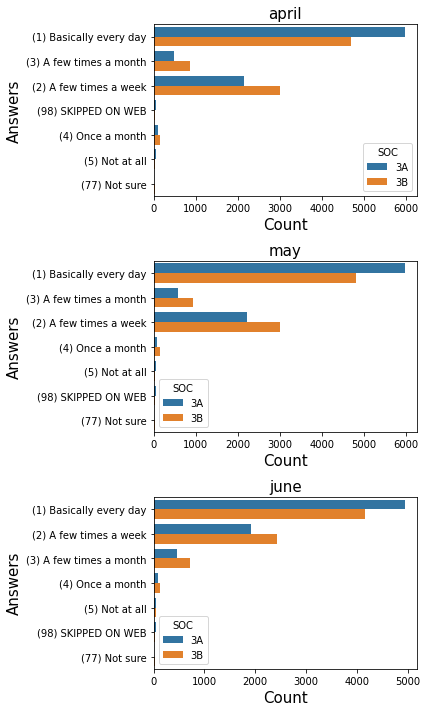

In [16]:
months = covid_soc['month'].unique()
fig, axes = plt.subplots(len(months), 1, figsize=(6, 10))

for i, ax in enumerate(axes):
    df = covid_soc[covid_soc['month'] == months[i]]
    sns.countplot(data=df, y='results', hue='SOC', ax=ax)
    ax.set_title(months[i], fontsize=15)
    ax.set_ylabel('Answers', fontsize=15)
    ax.set_xlabel('Count', fontsize=15)
plt.tight_layout()

Note: All months seem to follow the same pattern

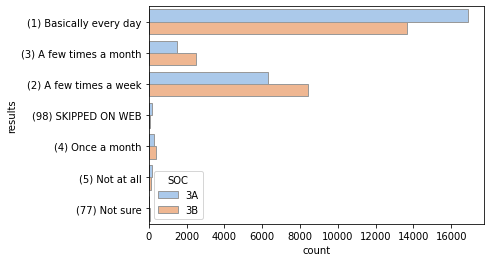

In [17]:
sns.countplot(data=covid_soc, y='results', hue='SOC', palette="pastel", edgecolor=".6")

# Conclusion
From the data we can conclude that during the pandemic, the weekly and monthly online communication amongst friends and family decreased but the daily online communication between friends and family has increased. In other words, during the pandemic, online communication is playing a vital role in keeping the community connected.

Furthermore, if before the pandemic people were connecting with their friends less frequently, then we can also argue that the virus has brought people closer together via more daily messaging. In conclusion, social distancing is in fact building communities, not destroying them.

---

# Source
https://data.world/associatedpress/covid-impact-survey-public-data/